In [1]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hyperparam_scan_util import GridScan
pd.set_option('display.max_columns', None)

In [2]:
scan = GridScan.load("main_v3.1", root="results")

df_filename = "analysis.parquet"

# Comment this out if you don't need to reload and export the trials
scan.export_trials_df(df_filename, loading_progress=True)

trials_df = scan.load_exported_trials_df(df_filename)
trials_df.info()

Loading trials for scan main_v3.1...


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Columns: 124 entries, run_id to metrics.train_time_std
dtypes: bool(1), float64(91), int64(26), object(6)
memory usage: 4.0+ KB


In [3]:
trials_df.head()

,run_id,config_hash,started_at,finished_at,duration,error,config.device_count,config.seed,config.tau,config.I0,config.eps,config.Nout,config.w_scale,config.T,config.K,config.dt,config.gamma,config.Nbatch,config.tau_lr,config.beta1,config.beta2,config.p_flip,config.Nepochs,config.Ntrain,config.Nin,config.Nsamples,config.normalize_times,config.Nhidden,config.Nlayer,config.lr,metrics.acc_init_mean,metrics.acc_init_std,metrics.acc_final_mean,metrics.acc_final_std,metrics.acc_min_epoch,metrics.acc_min_mean,metrics.acc_min_std,metrics.acc_max_epoch,metrics.acc_max_mean,metrics.acc_max_std,metrics.acc_ord_init_mean,metrics.acc_ord_init_std,metrics.acc_ord_final_mean,metrics.acc_ord_final_std,metrics.acc_ord_min_epoch,metrics.acc_ord_min_mean,metrics.acc_ord_min_std,metrics.acc_ord_max_epoch,metrics.acc_ord_max_mean,metrics.acc_ord_max_std,metrics.activity_init_mean,metrics.activity_init_std,metrics.activity_final_mean,metrics.activity_final_std,metrics.activity_min_epoch,metrics.activity_min_mean,metrics.activity_min_std,metrics.activity_max_epoch,metrics.activity_max_mean,metrics.activity_max_std,metrics.activity_first_init_mean,metrics.activity_first_init_std,metrics.activity_first_final_mean,metrics.activity_first_final_std,metrics.activity_first_min_epoch,metrics.activity_first_min_mean,metrics.activity_first_min_std,metrics.activity_first_max_epoch,metrics.activity_first_max_mean,metrics.activity_first_max_std,metrics.epoch_time_mean,metrics.epoch_time_std,metrics.init_compile_time_mean,metrics.init_compile_time_std,metrics.init_optim_time_mean,metrics.init_optim_time_std,metrics.init_phi0_time_mean,metrics.init_phi0_time_std,metrics.init_time_mean,metrics.init_time_std,metrics.init_weights_time_mean,metrics.init_weights_time_std,metrics.loss_init_mean,metrics.loss_init_std,metrics.loss_final_mean,metrics.loss_final_std,metrics.loss_min_epoch,metrics.loss_min_mean,metrics.loss_min_std,metrics.loss_max_epoch,metrics.loss_max_mean,metrics.loss_max_std,metrics.loss_ord_init_mean,metrics.loss_ord_init_std,metrics.loss_ord_final_mean,metrics.loss_ord_final_std,metrics.loss_ord_min_epoch,metrics.loss_ord_min_mean,metrics.loss_ord_min_std,metrics.loss_ord_max_epoch,metrics.loss_ord_max_mean,metrics.loss_ord_max_std,metrics.silent_neurons_init_mean,metrics.silent_neurons_init_std,metrics.silent_neurons_final_mean,metrics.silent_neurons_final_std,metrics.silent_neurons_min_epoch,metrics.silent_neurons_min_mean,metrics.silent_neurons_min_std,metrics.silent_neurons_max_epoch,metrics.silent_neurons_max_mean,metrics.silent_neurons_max_std,metrics.silent_neurons_first_init_mean,metrics.silent_neurons_first_init_std,metrics.silent_neurons_first_final_mean,metrics.silent_neurons_first_final_std,metrics.silent_neurons_first_min_epoch,metrics.silent_neurons_first_min_mean,metrics.silent_neurons_first_min_std,metrics.silent_neurons_first_max_epoch,metrics.silent_neurons_first_max_mean,metrics.silent_neurons_first_max_std,metrics.train_time_mean,metrics.train_time_std
0,20240916_142009,20d6afdd8afebea26bdc1b33ac1e459f,2024-09-16_14-24-33_107599,2024-09-16_14-28-50_762264,257.654665,None,1,0,1.909859,1.25,0.000001,20,0.5,2.0,300,0.001,0.01,1000,100.0,0.9,0.999,0.0,100,None,700,3,True,200,2,0.001,0.052956,0.005641,0.173485,0.015536,0,0.052956,0.005641,85,0.194593,0.004800,0.044865,0.001159,0.043007,0.003819,91,0.041458,0.00219,12,0.050751,0.003586,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.813013,0.025413,0.000586,0.000015,0.014845,0.018308,0.013959,0.018826,3.330668,0.982506,0.111636,0.155861,3.138103,0.011104,2.753936,0.002136,100,2.753936,0.002136,0,3.138103,0.011104,3.012916,0.0,3.012916,0.0,0,3.012916,0.0,0,3.012916,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,81.301338,2.541270
1,20240916_142009,956d5469cb0dcd2d4bf18918305809d2,2024-09-16_14-33-06_549828,2024-09-16_14-37-30_140271,263.590443,None,1,0,1.909859,1.25,0.000001,20,0.5,2.0,300,0.001,0.01,1000,100.0,0.9,0.999,0.0,100,None,7

## Error Summary

In [4]:
n_error = trials_df["error"].notna().sum()
print(f"{n_error} / {len(trials_df)} trials contain errors")
print()

for i, error in enumerate(trials_df["error"].dropna().sort_values().unique()):
    short_error = str(error).split("---", 1)[0].strip().split("\n")[-1]
    print(short_error)
    trials = trials_df[trials_df["error"] == error]
    print(f"Appears in {len(trials)} trials: {trials['config_hash'].tolist()}")
    print()

0 / 4 trials contain errors



In [5]:
from spikegd.utils.plotting import LinePlot, PlotGrid


def key_format(key: str):
    return key.removeprefix("config.").removeprefix("metrics.")


indep_keys = tuple(
    key for key in trials_df.columns
    if key.startswith("config.") and key != "config.Nin"
)
print("independent keys:", indep_keys)

# PlotGrid(
#     arg_keys=("config.Nt",),
#     func_keys=(
#         "metrics.acc_max_mean",
#         "metrics.epoch_time_mean"
#     ),
#     plot_type=LinePlot(
#         graph_key="config.Nbatch",
#         x_scale="log",
#     ),
#     col_key="config.Nin_virtual",
#     whitelists={"config.Nin_virtual": [8, 16, 24]},
#     indep_keys=indep_keys,
#     key_format=key_format,
# ).show(trials_df)

independent keys: ('config.device_count', 'config.seed', 'config.tau', 'config.I0', 'config.eps', 'config.Nout', 'config.w_scale', 'config.T', 'config.K', 'config.dt', 'config.gamma', 'config.Nbatch', 'config.tau_lr', 'config.beta1', 'config.beta2', 'config.p_flip', 'config.Nepochs', 'config.Ntrain', 'config.Nsamples', 'config.normalize_times', 'config.Nhidden', 'config.Nlayer', 'config.lr')


## Best trials

In [6]:
trials_df.sort_values("metrics.acc_max_mean", ascending=False).head(10)

,run_id,config_hash,started_at,finished_at,duration,error,config.device_count,config.seed,config.tau,config.I0,config.eps,config.Nout,config.w_scale,config.T,config.K,config.dt,config.gamma,config.Nbatch,config.tau_lr,config.beta1,config.beta2,config.p_flip,config.Nepochs,config.Ntrain,config.Nin,config.Nsamples,config.normalize_times,config.Nhidden,config.Nlayer,config.lr,metrics.acc_init_mean,metrics.acc_init_std,metrics.acc_final_mean,metrics.acc_final_std,metrics.acc_min_epoch,metrics.acc_min_mean,metrics.acc_min_std,metrics.acc_max_epoch,metrics.acc_max_mean,metrics.acc_max_std,metrics.acc_ord_init_mean,metrics.acc_ord_init_std,metrics.acc_ord_final_mean,metrics.acc_ord_final_std,metrics.acc_ord_min_epoch,metrics.acc_ord_min_mean,metrics.acc_ord_min_std,metrics.acc_ord_max_epoch,metrics.acc_ord_max_mean,metrics.acc_ord_max_std,metrics.activity_init_mean,metrics.activity_init_std,metrics.activity_final_mean,metrics.activity_final_std,metrics.activity_min_epoch,metrics.activity_min_mean,metrics.activity_min_std,metrics.activity_max_epoch,metrics.activity_max_mean,metrics.activity_max_std,metrics.activity_first_init_mean,metrics.activity_first_init_std,metrics.activity_first_final_mean,metrics.activity_first_final_std,metrics.activity_first_min_epoch,metrics.activity_first_min_mean,metrics.activity_first_min_std,metrics.activity_first_max_epoch,metrics.activity_first_max_mean,metrics.activity_first_max_std,metrics.epoch_time_mean,metrics.epoch_time_std,metrics.init_compile_time_mean,metrics.init_compile_time_std,metrics.init_optim_time_mean,metrics.init_optim_time_std,metrics.init_phi0_time_mean,metrics.init_phi0_time_std,metrics.init_time_mean,metrics.init_time_std,metrics.init_weights_time_mean,metrics.init_weights_time_std,metrics.loss_init_mean,metrics.loss_init_std,metrics.loss_final_mean,metrics.loss_final_std,metrics.loss_min_epoch,metrics.loss_min_mean,metrics.loss_min_std,metrics.loss_max_epoch,metrics.loss_max_mean,metrics.loss_max_std,metrics.loss_ord_init_mean,metrics.loss_ord_init_std,metrics.loss_ord_final_mean,metrics.loss_ord_final_std,metrics.loss_ord_min_epoch,metrics.loss_ord_min_mean,metrics.loss_ord_min_std,metrics.loss_ord_max_epoch,metrics.loss_ord_max_mean,metrics.loss_ord_max_std,metrics.silent_neurons_init_mean,metrics.silent_neurons_init_std,metrics.silent_neurons_final_mean,metrics.silent_neurons_final_std,metrics.silent_neurons_min_epoch,metrics.silent_neurons_min_mean,metrics.silent_neurons_min_std,metrics.silent_neurons_max_epoch,metrics.silent_neurons_max_mean,metrics.silent_neurons_max_std,metrics.silent_neurons_first_init_mean,metrics.silent_neurons_first_init_std,metrics.silent_neurons_first_final_mean,metrics.silent_neurons_first_final_std,metrics.silent_neurons_first_min_epoch,metrics.silent_neurons_first_min_mean,metrics.silent_neurons_first_min_std,metrics.silent_neurons_first_max_epoch,metrics.silent_neurons_first_max_mean,metrics.silent_neurons_first_max_std,metrics.train_time_mean,metrics.train_time_std
2,20240916_142009,a476ab9105c8f045f7742ba2b8be0f5a,2024-09-16_14-28-51_799374,2024-09-16_14-33-06_116853,254.317479,None,1,0,1.909859,1.25,0.000001,20,0.5,2.0,300,0.001,0.01,1000,100.0,0.9,0.999,0.0,100,None,700,3,True,300,2,0.001,0.049771,0.001955,0.187229,0.014008,1,0.046707,0.008996,98,0.205525,0.011042,0.044865,0.001159,0.043007,0.003819,91,0.041458,0.00219,12,0.050751,0.003586,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.801727,0.016676,0.000589,0.000039,0.015130,0.018778,0.013934,0.018846,3.349551,1.098100,0.106788,0.149066,3.148686,0.006921,2.695962,0.008017,100,2.695962,0.008017,0,3.148686,0.006921,3.012916,0.0,3.012916,0.0,0,3.012916,0.0,0,3.012916,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,80.172684,1.667614
0,20240916_142009,20d6afdd8afebea26bdc1b33ac1e459f,2024-09-16_14-24-33_107599,2024-09-16_14-28-50_762264,257.654665,None,1,0,1.909859,1.25,0.000001,20,0.5,2.0,300,0.001,0.01,1000,100.0,0.9,0.999,0.0,100,None,7

In [7]:
best_trial = trials_df.loc[trials_df["metrics.acc_max_mean"].idxmax()]
print("===== BEST TRIAL =====")
print(best_trial[[
    "config_hash", "duration",
    *indep_keys,
    "metrics.acc_max_mean", "metrics.acc_max_std", "metrics.acc_max_epoch"
]])

===== BEST TRIAL =====
config_hash               a476ab9105c8f045f7742ba2b8be0f5a
duration                                        254.317479
config.device_count                                      1
config.seed                                              0
config.tau                                        1.909859
config.I0                                             1.25
config.eps                                        0.000001
config.Nout                                             20
config.w_scale                                         0.5
config.T                                               2.0
config.K                                               300
config.dt                                            0.001
config.gamma                                          0.01
config.Nbatch                                         1000
config.tau_lr                                        100.0
config.beta1                                           0.9
config.beta2                     

In [9]:
trials_df["metrics.epoch_time_mean"].describe()

count    4.000000
mean     0.818682
std      0.013908
min      0.801727
25%      0.810192
50%      0.820733
75%      0.829223
max      0.831536
Name: metrics.epoch_time_mean, dtype: float64

In [10]:
trials_df["metrics.acc_max_epoch"].describe()

count     4.000000
mean     91.000000
std       6.055301
min      85.000000
25%      86.500000
50%      90.500000
75%      95.000000
max      98.000000
Name: metrics.acc_max_epoch, dtype: float64

Look at accuracy evolution over epochs:

===== BEST TRIAL 0 =====
CONFIG
- device_count            1
- seed                    0
- tau                     1/6 pi^-1
- I0                      1.25
- eps                     1e-06
- Nout                    20
- w_scale                 0.5
- T                       2
- K                       300
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 100
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- Nhidden                 300
- Nlayer                  2
- lr                      0.001
METRICS
- acc_init                      0.0498 ± 0.0020
- acc_final                     0.1872 ± 0.0140
- acc_min                       0.0467 ± 0.0090 at epoch 1
- acc_max                       0.2055 ± 0.0110 at epoch 98
- acc_ord_init        

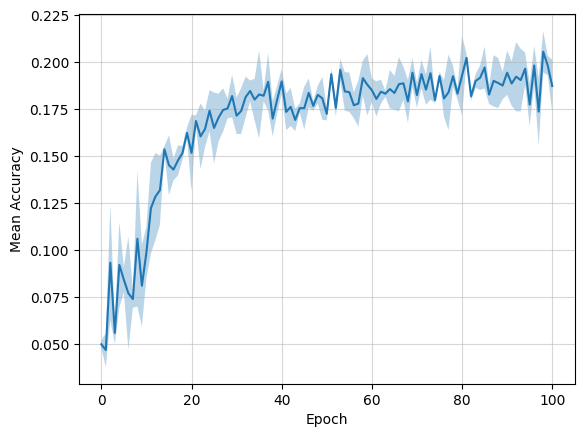

===== BEST TRIAL 1 =====
CONFIG
- device_count            1
- seed                    0
- tau                     1/6 pi^-1
- I0                      1.25
- eps                     1e-06
- Nout                    20
- w_scale                 0.5
- T                       2
- K                       300
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 100
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- Nhidden                 200
- Nlayer                  2
- lr                      0.001
METRICS
- acc_init                      0.0530 ± 0.0056
- acc_final                     0.1735 ± 0.0155
- acc_min                       0.0530 ± 0.0056 at epoch 0
- acc_max                       0.1946 ± 0.0048 at epoch 85
- acc_ord_init        

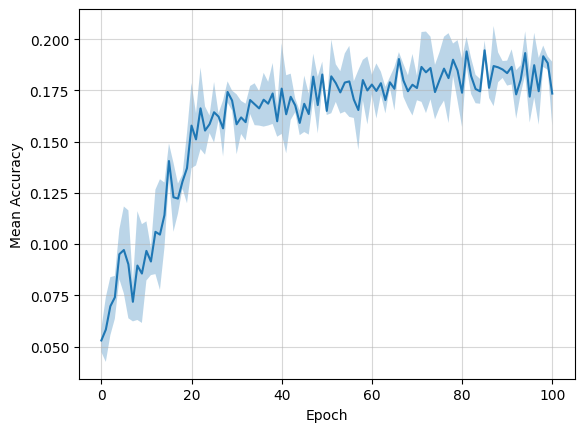

===== BEST TRIAL 2 =====
CONFIG
- device_count            1
- seed                    0
- tau                     1/6 pi^-1
- I0                      1.25
- eps                     1e-06
- Nout                    20
- w_scale                 0.5
- T                       2
- K                       300
- dt                      0.001
- gamma                   0.01
- Nbatch                  1000
- tau_lr                  100
- beta1                   0.9
- beta2                   0.999
- p_flip                  0
- Nepochs                 100
- Ntrain                  None
- Nin                     700
- Nsamples                3
- normalize_times         1
- Nhidden                 100
- Nlayer                  2
- lr                      0.001
METRICS
- acc_init                      0.0468 ± 0.0078
- acc_final                     0.1728 ± 0.0158
- acc_min                       0.0468 ± 0.0078 at epoch 0
- acc_max                       0.1927 ± 0.0100 at epoch 94
- acc_ord_init        

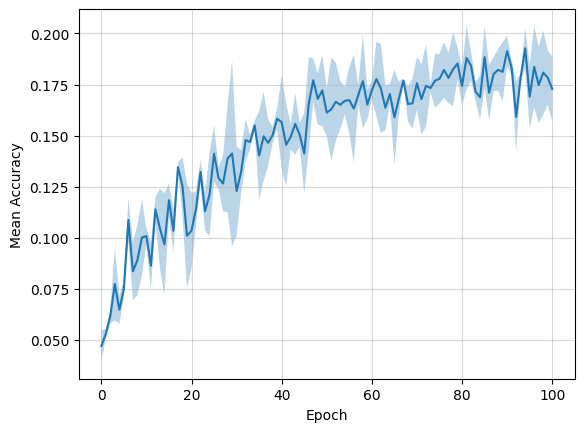

In [12]:
from spikegd.utils.formatting import print_dict

def plot_training_curves(config_hash):
    trial = scan.load_trial(config_hash)
    epoch_metrics: list = trial.metrics["epochs"]
    
    epochs = np.arange(len(epoch_metrics))
    acc_mean = np.array([metrics["acc_mean"] for metrics in epoch_metrics])
    acc_std = np.array([metrics["acc_std"] for metrics in epoch_metrics])
    
    fig, ax = plt.subplots()

    ax.plot(epochs, acc_mean)
    ax.fill_between(epochs, acc_mean - acc_std, acc_mean + acc_std, alpha=0.3)

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Mean Accuracy")
    ax.grid(alpha=0.5)

    plt.show()

def summarize_trial(trial_row):
    print("CONFIG")
    print_dict(
        {
            "- " + key.removeprefix("config."): value
            for key, value in trial_row.items()
            if key.startswith("config.")
        }
    )
    print("METRICS")

    def summarize_metric(mean_key):
        std_key = mean_key.replace("_mean", "_std")
        epoch_key = mean_key.replace("_mean", "_epoch")

        s = f"{trial_row[mean_key]:.4f}"

        if std_key in trial_row:
            s += f" ± {trial_row[std_key]:.4f}"

        if epoch_key in trial_row:
            s += f" at epoch {trial_row[epoch_key]:.0f}"

        return s

    print_dict(
        {
            "- " + key.removeprefix("metrics.").removesuffix("_mean"): summarize_metric(key)
            for key, value in trial_row.items()
            if key.startswith("metrics.") and key.endswith("_mean")
        },
        indent=32,
    )

best_trials = trials_df \
    .sort_values("metrics.acc_max_mean", ascending=False, ignore_index=True) \
    .head(3)

for i, best_trial in best_trials.iterrows():
    print(f"===== BEST TRIAL {i} =====")
    # print(f"Max accuracy: {best_trial['metrics.acc_max_mean']:.4f} ± {best_trial['metrics.acc_max_std']:.4f} at epoch {best_trial['metrics.acc_max_epoch']}")
    summarize_trial(best_trial)
    plot_training_curves(best_trial["config_hash"])